In [1]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
from algos import reconstruct, reconstruct_1bit, reconstruct_biht
from utils import img_show_unit_ball, sign
from sklearn.datasets import fetch_openml

In [2]:
# Load MNIST
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
x_0 = X[600] / 255.0

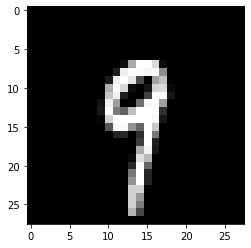

In [3]:
plt.imshow(x_0.reshape((28, 28)), cmap="gray")
plt.show()

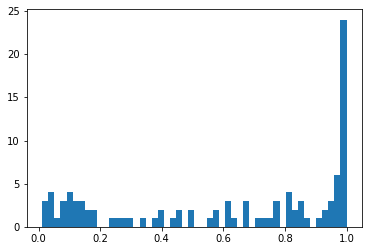

In [4]:
plt.hist(x_0[x_0 > 0], bins=50)
plt.show()

In [5]:
# Parameters

n = x_0.shape[0]
m = 500
# use effective sparsity (like in Plan & Vershynin)
s = int(np.floor((np.linalg.norm(x_0, 1) / np.linalg.norm(x_0, 2)) ** 2))
# Generate sensing matrix
A = np.random.randn(m, n)
# Compute y
y = sign(A.dot(x_0))

In [6]:
xx = reconstruct_1bit(y, A)
xx_cs = reconstruct(y, A)
biht_steps = 100
xx_biht = reconstruct_biht(y, A, s, biht_steps)

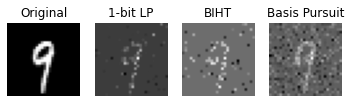

In [7]:
fig, (ax4, ax1, ax2, ax3) = plt.subplots(1, 4)
side = int(np.sqrt(xx.shape[0]))
ax1.imshow(xx.reshape(side, side) / np.linalg.norm(xx), cmap="gray")
side = int(np.sqrt(xx_cs.shape[0]))
ax3.imshow(xx_cs.reshape(side, side) / np.linalg.norm(xx_cs), cmap="gray")
side = int(np.sqrt(xx_biht.shape[0]))
ax2.imshow(xx_biht.reshape(side, side) / np.linalg.norm(xx_biht), cmap="gray")
ax4.imshow(x_0.reshape((28, 28)), cmap="gray")


ax1.set_title("1-bit LP")
ax2.set_title("BIHT")
ax3.set_title("Basis Pursuit")
ax4.set_title("Original")


ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")


plt.savefig("figures/mnist.png", dpi=800)